In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Fully_Cleaned_data.csv')

In [4]:
df[df['price']>400000]

,model,price,rating,card,os,Dual_Display,has_5g,has_nfc,has_ir_blaster,processor_name,...,fast_charging_available,fast_charging,screen_size_inches,resolution,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,brand_name
687,xiaomi redmi k20 pro signature edition,480000,88.0,memory card not supported,android,0,False,True,False,snapdragon 855,...,1,27.0,6.39,1080 x 2340,60,3,1,48.0,20.0,xiaomi


In [5]:
df['price'] = df['price'].clip(0,199990)
df['battery_capacity_mAh'] = df['battery_capacity_mAh'].clip(0,10800)

In [6]:
df.shape

(961, 26)

In [7]:
df.isnull().sum()

model                        0
price                        0
rating                      96
card                       276
os                           0
Dual_Display                 0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_name              27
processor_brand             27
num_core                     0
processor_speed_GHz         82
ram_capacity                 0
internal_memory              0
battery_capacity_mAh         0
fast_charging_available      0
fast_charging                0
screen_size_inches           0
resolution                   0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras            0
primary_camera_rear          0
primary_camera_front         1
brand_name                   0
dtype: int64

In [8]:
df['resolution_width'] = df['resolution'].str.split('x').str[0].astype(int)
df['resolution_height'] = df['resolution'].str.split('x').str[1].astype(int)


In [9]:
df[df['primary_camera_front'].isna()].values
# in this mobile there is no front camera

array([['xiaomi mi mix alpha', 199990, nan, 'memory card not supported',
        'android', 0, True, False, False, 'snapdragon 855+',
        'qualcomm snapdragon', 8, 2.96, 12.0, 512, 4050.0, 1, 40.0, 7.92,
        '2088\u2009x\u20092250\u2009', 60, 3, 1, 108.0, nan, 'xiaomi',
        2088, 2250]], dtype=object)

In [10]:
df = df.drop(columns=['model','rating','card','processor_name','resolution'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    961 non-null    int64  
 1   os                       961 non-null    object 
 2   Dual_Display             961 non-null    int64  
 3   has_5g                   961 non-null    bool   
 4   has_nfc                  961 non-null    bool   
 5   has_ir_blaster           961 non-null    bool   
 6   processor_brand          934 non-null    object 
 7   num_core                 961 non-null    int64  
 8   processor_speed_GHz      879 non-null    float64
 9   ram_capacity             961 non-null    float64
 10  internal_memory          961 non-null    int64  
 11  battery_capacity_mAh     961 non-null    float64
 12  fast_charging_available  961 non-null    int64  
 13  fast_charging            961 non-null    float64
 14  screen_size_inches       9

In [12]:
df.isnull().sum()

price                       0
os                          0
Dual_Display                0
has_5g                      0
has_nfc                     0
has_ir_blaster              0
processor_brand            27
num_core                    0
processor_speed_GHz        82
ram_capacity                0
internal_memory             0
battery_capacity_mAh        0
fast_charging_available     0
fast_charging               0
screen_size_inches          0
refresh_rate                0
num_rear_cameras            0
num_front_cameras           0
primary_camera_rear         0
primary_camera_front        1
brand_name                  0
resolution_width            0
resolution_height           0
dtype: int64

In [13]:
df['processor_brand'] = df['processor_brand'].fillna('missing')

In [14]:
df[df['primary_camera_front'].isna()]

,price,os,Dual_Display,has_5g,has_nfc,has_ir_blaster,processor_brand,num_core,processor_speed_GHz,ram_capacity,...,fast_charging,screen_size_inches,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,brand_name,resolution_width,resolution_height
552,199990,android,0,True,False,False,qualcomm snapdragon,8,2.96,12.0,...,40.0,7.92,60,3,1,108.0,NaN,xiaomi,2088,2250


In [15]:
object_columns = df.select_dtypes('object').columns
object_columns

Index(['os', 'processor_brand', 'brand_name'], dtype='object')

In [16]:
# made a copy
df_copy = df.copy()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    961 non-null    int64  
 1   os                       961 non-null    object 
 2   Dual_Display             961 non-null    int64  
 3   has_5g                   961 non-null    bool   
 4   has_nfc                  961 non-null    bool   
 5   has_ir_blaster           961 non-null    bool   
 6   processor_brand          961 non-null    object 
 7   num_core                 961 non-null    int64  
 8   processor_speed_GHz      879 non-null    float64
 9   ram_capacity             961 non-null    float64
 10  internal_memory          961 non-null    int64  
 11  battery_capacity_mAh     961 non-null    float64
 12  fast_charging_available  961 non-null    int64  
 13  fast_charging            961 non-null    float64
 14  screen_size_inches       9

In [18]:
for object_col in object_columns:
    try:
        df[object_col]

        for brand in df[object_col]:
            df[brand] = 0
        
        for i in df.index:
            df[df[object_col]][i] = 1

    except:
        pass

C:\Users\admin\AppData\Local\Temp\ipykernel_7808\2544287604.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[object_col]][i] = 1
C:\Users\admin\AppData\Local\Temp\ipykernel_7808\2544287604.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[object_col]][i] = 1
C:\Users\admin\AppData\Local\Temp\ipykernel_7808\2544287604.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

C:\Users\admin\AppData\Local\Temp\ipykernel_7808\2544287604.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[object_col]][i] = 1
C:\Users\admin\AppData\Local\Temp\ipykernel_7808\2544287604.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[object_col]][i] = 1
C:\Users\admin\AppData\Local\Temp\ipykernel_7808\2544287604.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
df.isnull().sum()

price           0
os              0
Dual_Display    0
has_5g          0
has_nfc         0
               ..
blu             0
fairphone       0
unihertz        0
oukitel         0
zte             0
Length: 80, dtype: int64

In [ ]:
df.drop(columns=object_columns,inplace=True)

In [ ]:
df.columns

Index(['price', 'Dual_Display', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'num_core', 'processor_speed_GHz', 'ram_capacity', 'internal_memory',
       'battery_capacity_mAh', 'fast_charging_available', 'fast_charging',
       'screen_size_inches', 'refresh_rate', 'num_rear_cameras',
       'num_front_cameras', 'primary_camera_rear', 'primary_camera_front',
       'resolution_width', 'resolution_height', 'android', 'ios', 'harmony',
       'flyme 10', 'hongmeng os v4.0', 'qualcomm snapdragon', 'dimensity',
       'exynos', 'bionic', 'helio', 'tiger', 'unisoc', 'tensor', 'missing',
       'google', 'spreadtrum', 'kirin', 'xiaomi', 'motorola', 'samsung',
       'vivo', 'oneplus', 'realme', 'apple', 'infinix', 'oppo', 'iqoo', 'poco',
       'itel', 'nokia', 'honor', 'lava', 'huawei', 'jio', 'nothing', 'tecno',
       'asus', 'nubia', 'duoqin', 'redmi', 'meizu', 'tesla', 'gionee',
       'blackview', 'ikall', 'sony', 'benco', 'letv', 'cat', 'doogee', 'cubot',
       'htc', 'blu', 'fairp

In [ ]:
df.head(2)

,price,Dual_Display,has_5g,has_nfc,has_ir_blaster,num_core,processor_speed_GHz,ram_capacity,internal_memory,battery_capacity_mAh,...,letv,cat,doogee,cubot,htc,blu,fairphone,unihertz,oukitel,zte
0,20499,0,True,False,True,8,2.4,6.0,128,5200.0,...,0,0,0,0,0,0,0,0,0,0
1,22999,0,True,True,False,8,2.5,8.0,128,5000.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=5)

In [ ]:
df.isnull().sum()

df.columns

Index(['price', 'Dual_Display', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'num_core', 'processor_speed_GHz', 'ram_capacity', 'internal_memory',
       'battery_capacity_mAh', 'fast_charging_available', 'fast_charging',
       'screen_size_inches', 'refresh_rate', 'num_rear_cameras',
       'num_front_cameras', 'primary_camera_rear', 'primary_camera_front',
       'resolution_width', 'resolution_height', 'android', 'ios', 'harmony',
       'flyme 10', 'hongmeng os v4.0', 'qualcomm snapdragon', 'dimensity',
       'exynos', 'bionic', 'helio', 'tiger', 'unisoc', 'tensor', 'missing',
       'google', 'spreadtrum', 'kirin', 'xiaomi', 'motorola', 'samsung',
       'vivo', 'oneplus', 'realme', 'apple', 'infinix', 'oppo', 'iqoo', 'poco',
       'itel', 'nokia', 'honor', 'lava', 'huawei', 'jio', 'nothing', 'tecno',
       'asus', 'nubia', 'duoqin', 'redmi', 'meizu', 'tesla', 'gionee',
       'blackview', 'ikall', 'sony', 'benco', 'letv', 'cat', 'doogee', 'cubot',
       'htc', 'blu', 'fairp

In [ ]:
from sklearn.impute import KNNImputer

kn = KNNImputer(n_neighbors=5)

df_knn = kn.fit_transform(df)

df_after_knn = pd.DataFrame(df_knn,columns=df.columns)

In [ ]:
df_after_knn.head(3)
# now the processor speed column is filled

,price,Dual_Display,has_5g,has_nfc,has_ir_blaster,num_core,processor_speed_GHz,ram_capacity,internal_memory,battery_capacity_mAh,...,letv,cat,doogee,cubot,htc,blu,fairphone,unihertz,oukitel,zte
0,20499.0,0.0,1.0,0.0,1.0,8.0,2.4,6.0,128.0,5200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22999.0,0.0,1.0,1.0,0.0,8.0,2.5,8.0,128.0,5000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21990.0,0.0,1.0,1.0,1.0,8.0,2.8,12.0,256.0,5000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_copy['processor_speed_GHz'] = df_after_knn['processor_speed_GHz']
df_copy['primary_camera_front'] = df_after_knn['primary_camera_front']
# now the column is filled

In [ ]:
df_copy.head(3)

,price,os,Dual_Display,has_5g,has_nfc,has_ir_blaster,processor_brand,num_core,processor_speed_GHz,ram_capacity,...,fast_charging,screen_size_inches,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,brand_name,resolution_width,resolution_height
0,20499,android,0,True,False,True,qualcomm snapdragon,8,2.4,6.0,...,67.0,6.67,120,4,1,108.0,32.0,xiaomi,1080,2460
1,22999,android,0,True,True,False,dimensity,8,2.5,8.0,...,68.0,6.55,144,2,1,50.0,32.0,motorola,1080,2400
2,21990,android,0,True,True,True,dimensity,8,2.8,12.0,...,120.0,6.67,144,3,1,200.0,16.0,xiaomi,1220,2712


In [ ]:
df = df_copy.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    961 non-null    int64  
 1   os                       961 non-null    object 
 2   Dual_Display             961 non-null    int64  
 3   has_5g                   961 non-null    bool   
 4   has_nfc                  961 non-null    bool   
 5   has_ir_blaster           961 non-null    bool   
 6   processor_brand          961 non-null    object 
 7   num_core                 961 non-null    int64  
 8   processor_speed_GHz      961 non-null    float64
 9   ram_capacity             961 non-null    float64
 10  internal_memory          961 non-null    int64  
 11  battery_capacity_mAh     961 non-null    float64
 12  fast_charging_available  961 non-null    int64  
 13  fast_charging            961 non-null    float64
 14  screen_size_inches       9

In [ ]:
df['brand_name'].value_counts()

brand_name
samsung      138
xiaomi       125
vivo         109
realme        87
oppo          63
motorola      59
oneplus       51
apple         42
infinix       36
tecno         35
poco          33
iqoo          27
honor         24
nokia         16
nubia         13
itel          13
google        11
lava          11
huawei        10
sony           9
nothing        7
asus           6
ikall          5
doogee         4
meizu          3
cubot          3
duoqin         2
jio            2
redmi          2
letv           2
blackview      2
gionee         2
benco          1
cat            1
tesla          1
htc            1
blu            1
fairphone      1
unihertz       1
oukitel        1
zte            1
Name: count, dtype: int64

In [ ]:
df['brand_name'].value_counts().index

Index(['samsung', 'xiaomi', 'vivo', 'realme', 'oppo', 'motorola', 'oneplus',
       'apple', 'infinix', 'tecno', 'poco', 'iqoo', 'honor', 'nokia', 'nubia',
       'itel', 'google', 'lava', 'huawei', 'sony', 'nothing', 'asus', 'ikall',
       'doogee', 'meizu', 'cubot', 'duoqin', 'jio', 'redmi', 'letv',
       'blackview', 'gionee', 'benco', 'cat', 'tesla', 'htc', 'blu',
       'fairphone', 'unihertz', 'oukitel', 'zte'],
      dtype='object', name='brand_name')

In [ ]:
df.columns

Index(['price', 'os', 'Dual_Display', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'processor_brand', 'num_core', 'processor_speed_GHz', 'ram_capacity',
       'internal_memory', 'battery_capacity_mAh', 'fast_charging_available',
       'fast_charging', 'screen_size_inches', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'primary_camera_rear',
       'primary_camera_front', 'brand_name', 'resolution_width',
       'resolution_height'],
      dtype='object')

In [ ]:
# int_float_cols = df.select_dtypes(include=[int,float]).columns
# int_float_cols

# for col in int_float_cols:
#     plt.subplot(121)
#     sns.scatterplot(x = df[col], y = df['price'])
#     plt.xlabel(col)
#     plt.ylabel('Price')
#     plt.title(f'{col} vs Price Scatter Plot')
#     plt.show()

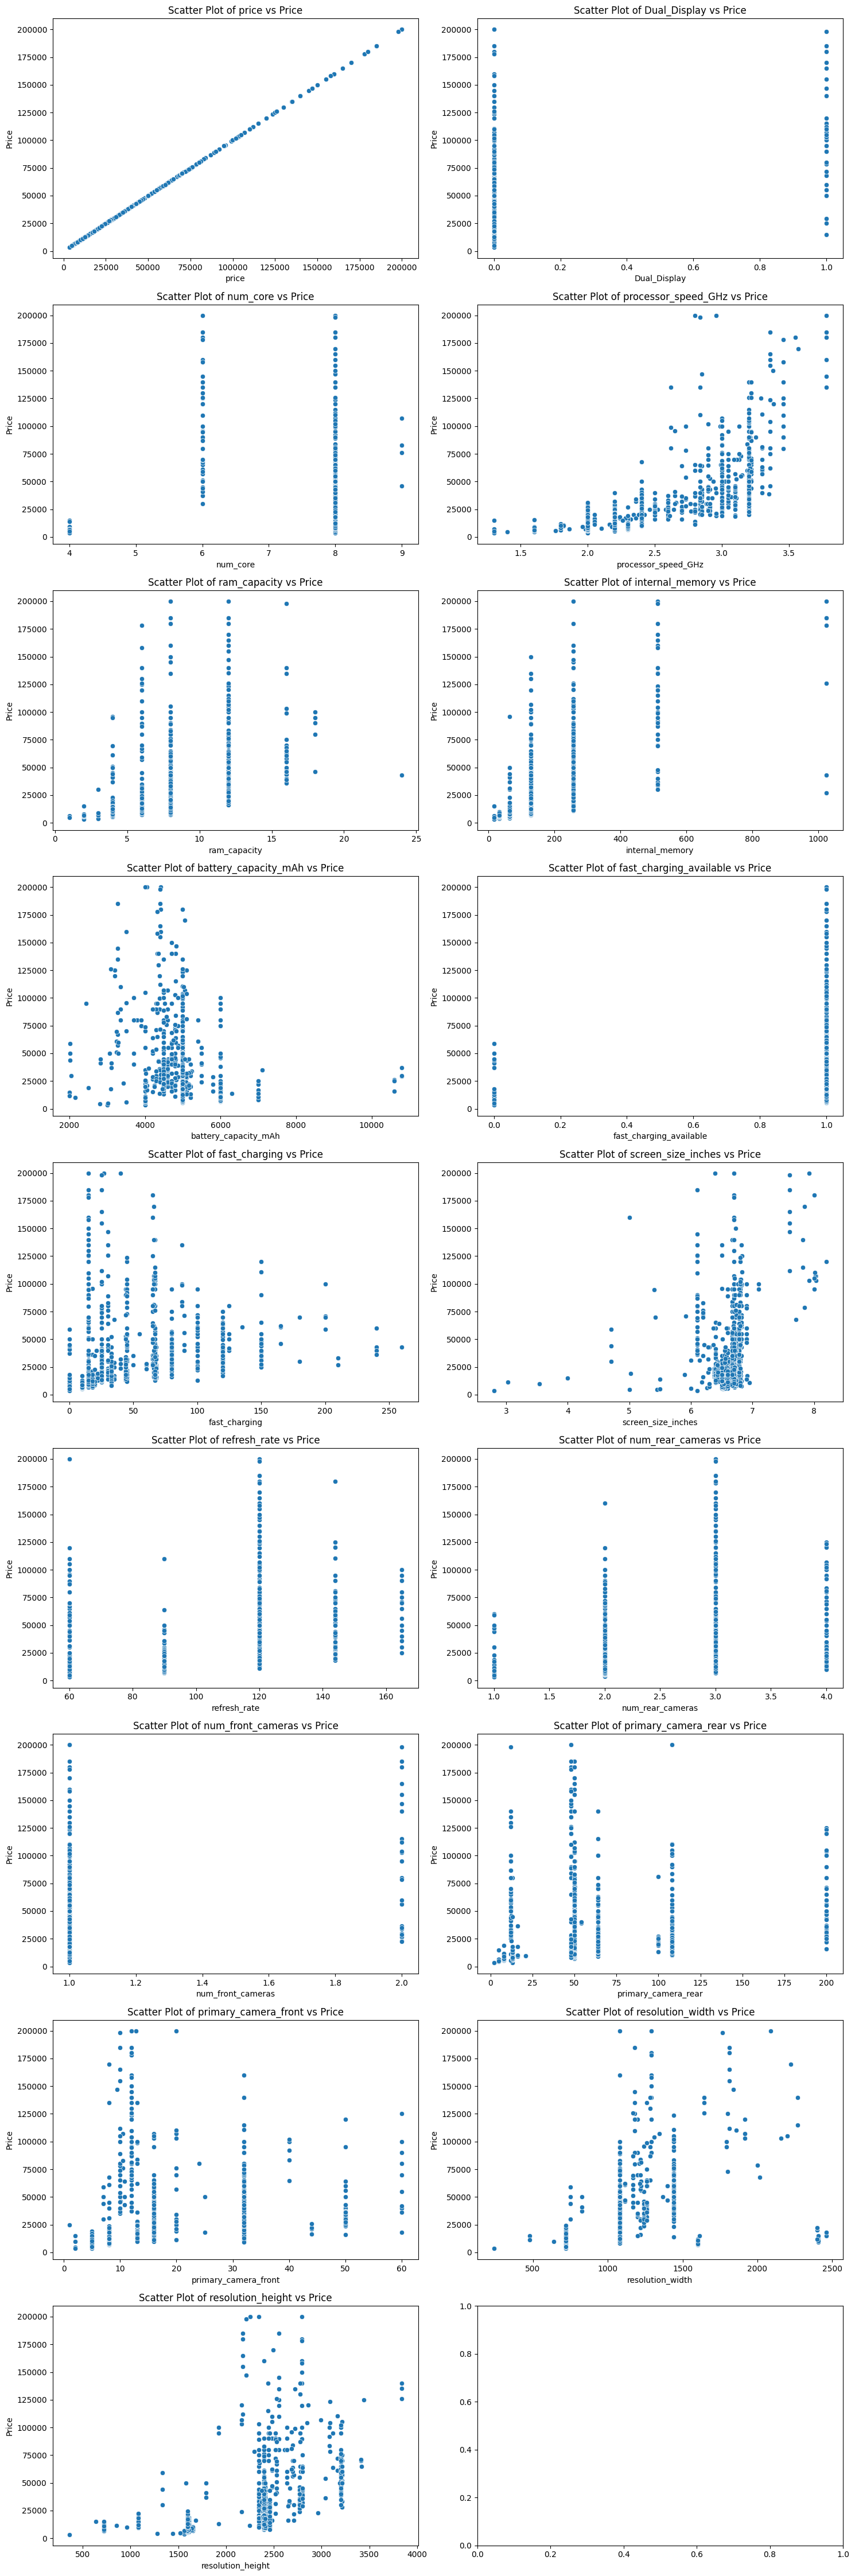

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select columns with int and float data types
int_float_cols = df.select_dtypes(include=['int', 'float']).columns

# Determine the number of rows and columns for subplots
num_cols = len(int_float_cols)
num_rows = num_cols // 2 + num_cols % 2  # Adjust for odd number of columns

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot scatter plots for each numeric column against 'price'
for i, col in enumerate(int_float_cols):
    sns.scatterplot(x=df[col], y=df['price'], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')
    axes[i].set_title(f'Scatter Plot of {col} vs Price')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


<Axes: >

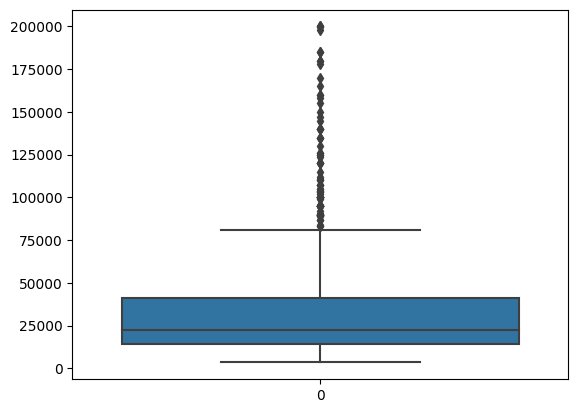

In [ ]:
# Price column has outlier
sns.boxplot(df['price'])

In [ ]:
round(df.describe())

,price,Dual_Display,num_core,processor_speed_GHz,ram_capacity,internal_memory,battery_capacity_mAh,fast_charging_available,fast_charging,screen_size_inches,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,resolution_width,resolution_height
count,961.0,961.0,961.0,961.0,961.0,961.0,961.0,961.0,961.0,961.0,961.0,961.0,961.0,961.0,961.0,961.0,961.0
mean,34404.0,0.0,8.0,3.0,8.0,177.0,4891.0,1.0,48.0,7.0,104.0,3.0,1.0,60.0,18.0,1110.0,2324.0
std,32810.0,0.0,1.0,0.0,3.0,122.0,759.0,0.0,40.0,0.0,28.0,1.0,0.0,39.0,12.0,280.0,483.0
min,3420.0,0.0,4.0,1.0,1.0,16.0,2000.0,0.0,0.0,3.0,60.0,1.0,1.0,2.0,1.0,240.0,360.0
25%,13999.0,0.0,8.0,2.0,6.0,128.0,4600.0,1.0,18.0,7.0,90.0,2.0,1.0,50.0,8.0,1080.0,2376.0
50%,22390.0,0.0,8.0,2.0,8.0,128.0,5000.0,1.0,33.0,7.0,120.0,3.0,1.0,50.0,16.0,1080.0,2400.0
75%,40999.0,0.0,8.0,3.0,8.0,256.0,5000.0,1.0,67.0,7.0,120.0,3.0,1.0,64.0,32.0,1080.0,2460.0
max,199990.0,1.0,9.0,4.0,24.0,1024.0,10800.0,1.0,260.0,8.0,165.0,4.0,2.0,200.0,60.0,2460.0,3840.0


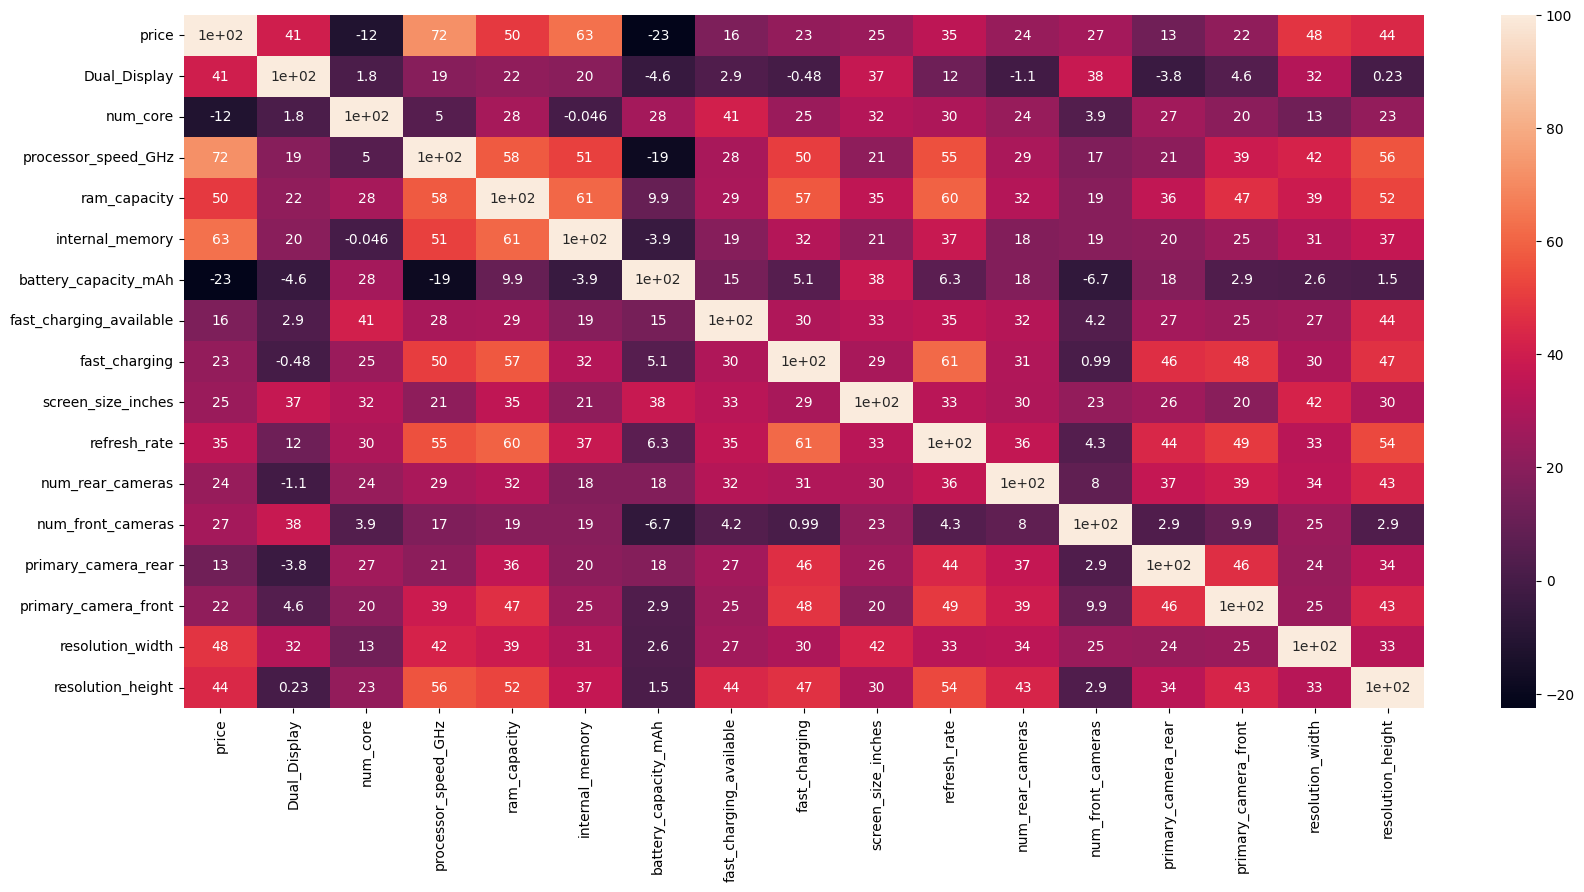

In [ ]:
int_float_df = df.select_dtypes(include=['int', 'float'])
plt.figure(figsize=(20, 9))  
sns.heatmap(int_float_df.corr()*100, annot=True)
plt.show()

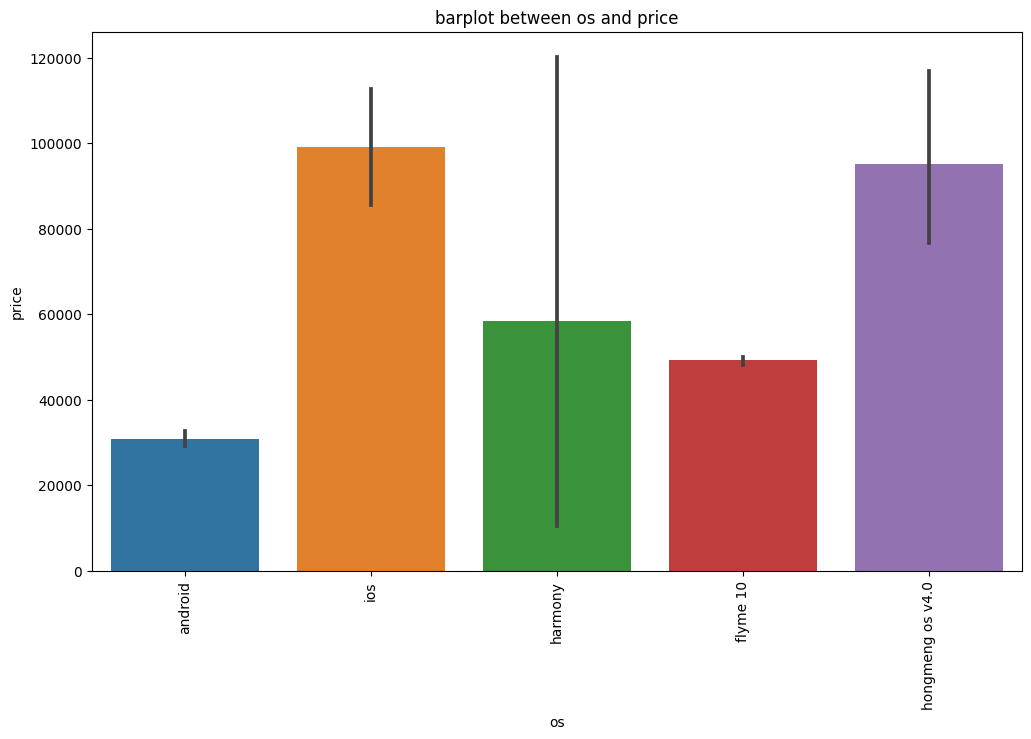

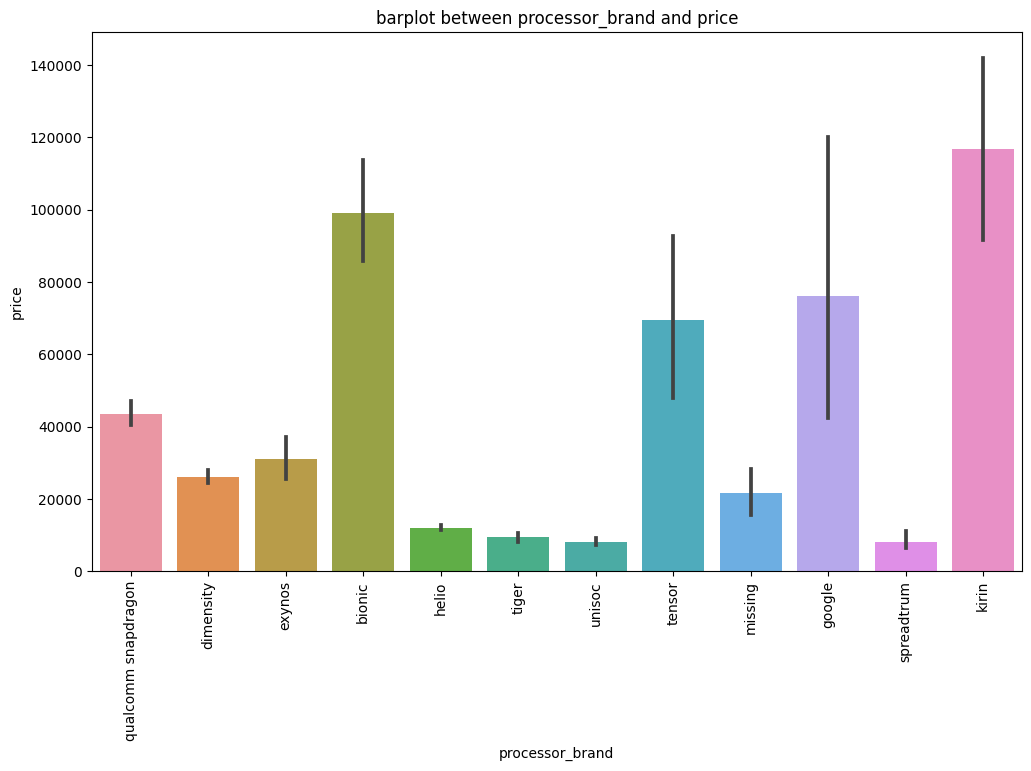

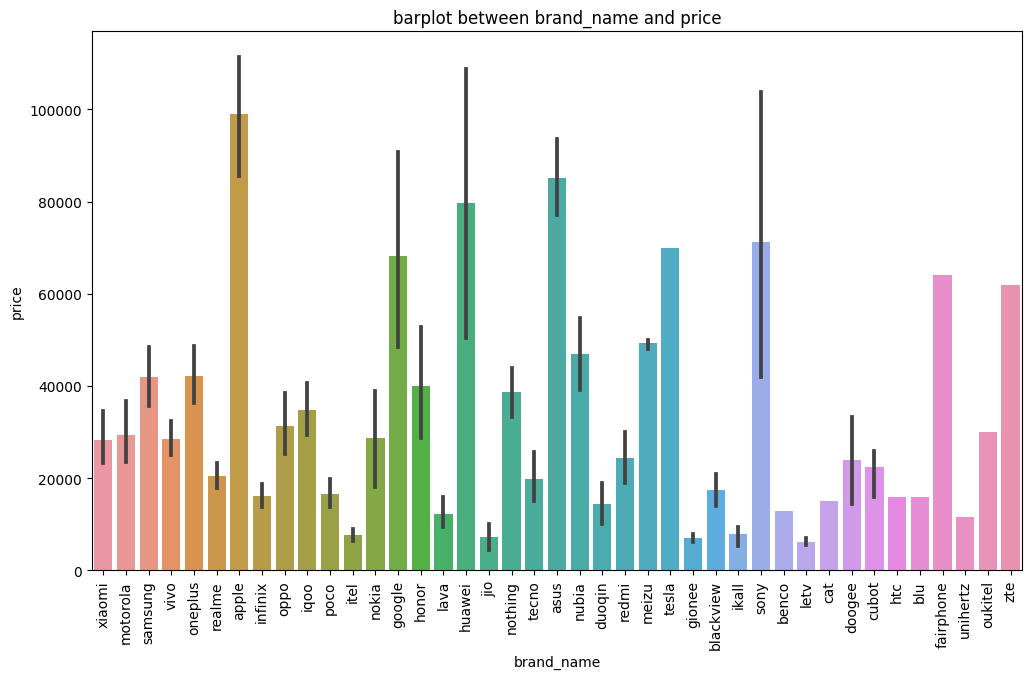

In [ ]:
object_cols = df.select_dtypes(object).columns

for col in object_cols:
    plt.figure(figsize=(12,7))
    sns.barplot(x=df[col],y=df['price'])
    plt.title(f'barplot between {col} and price')
    plt.xticks(rotation='vertical')
    plt.show()

<Axes: ylabel='count'>

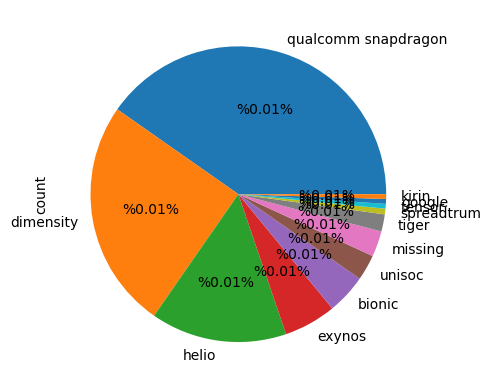

In [ ]:
df['processor_brand'].value_counts().plot(kind='pie',autopct='%%0.01%%')

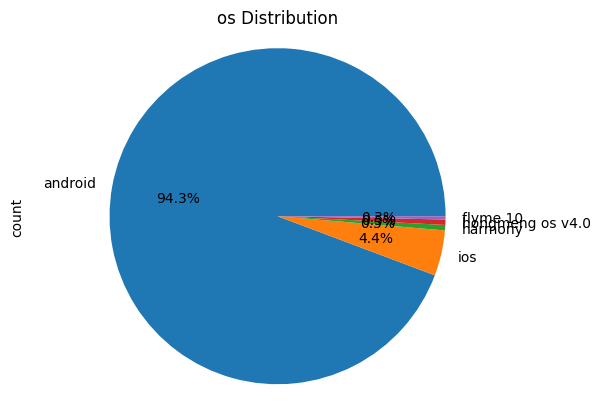

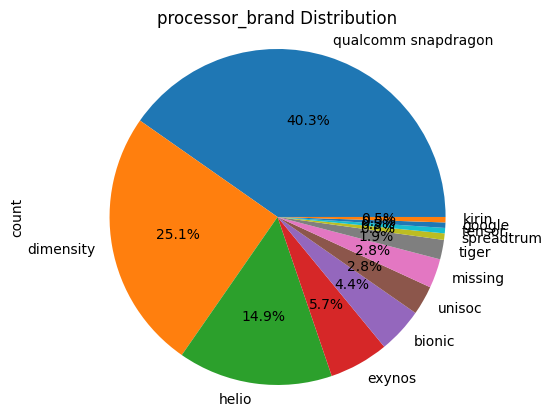

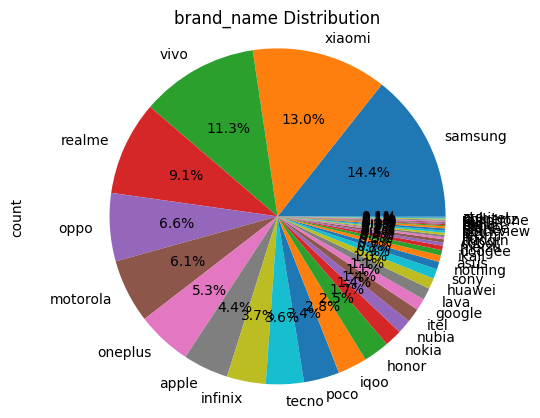

In [ ]:
obj_cols = df.select_dtypes(object).columns

for col in obj_cols:
    df[col].value_counts().plot(kind='pie', autopct='%0.1f%%')
    plt.title(f'{col} Distribution')
    plt.axis('equal') 
    plt.show()
    print()

C:\Users\admin\AppData\Local\Temp\ipykernel_9096\1563063068.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


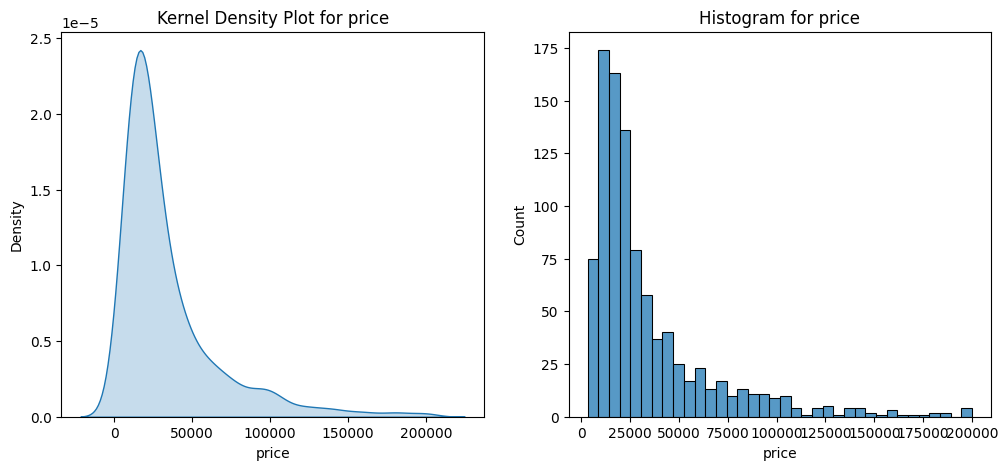

C:\Users\admin\AppData\Local\Temp\ipykernel_9096\1563063068.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


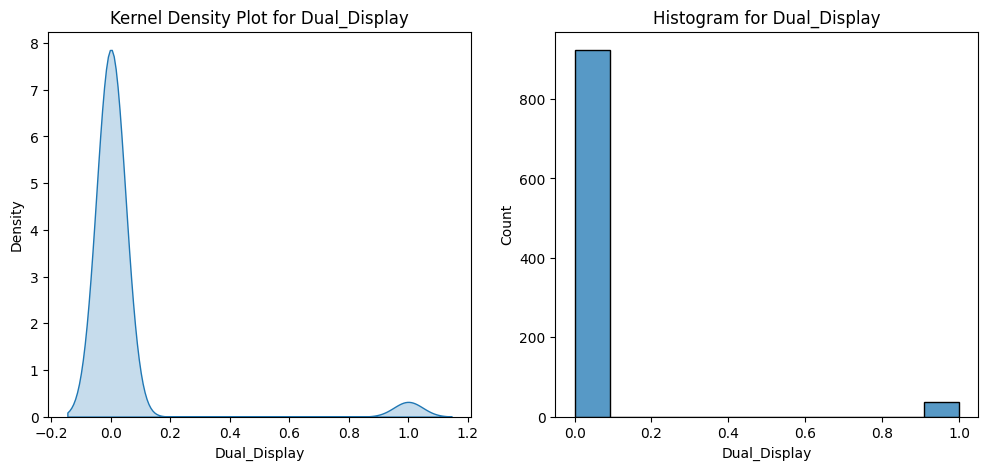

C:\Users\admin\AppData\Local\Temp\ipykernel_9096\1563063068.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


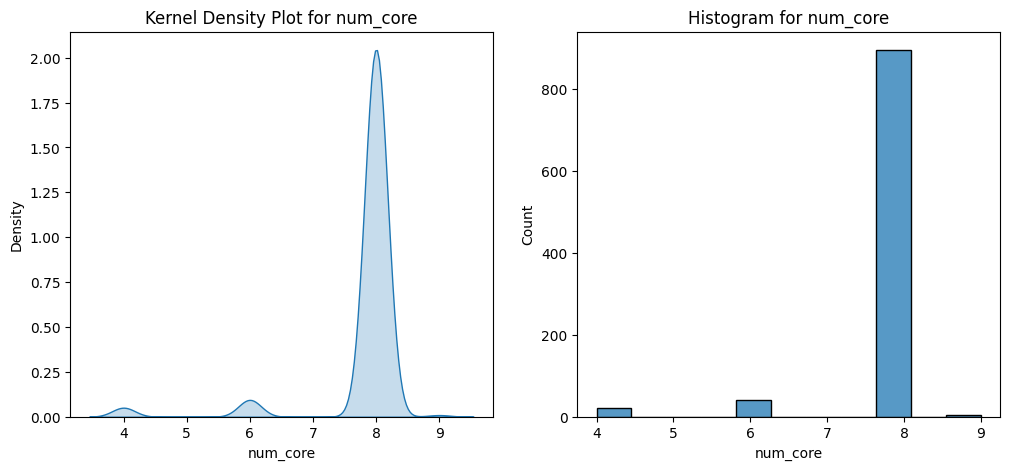

C:\Users\admin\AppData\Local\Temp\ipykernel_9096\1563063068.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


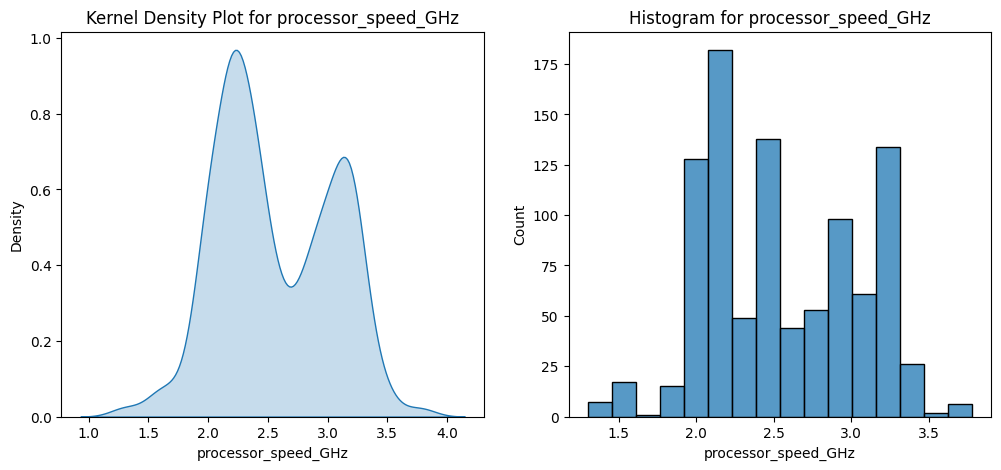

C:\Users\admin\AppData\Local\Temp\ipykernel_9096\1563063068.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


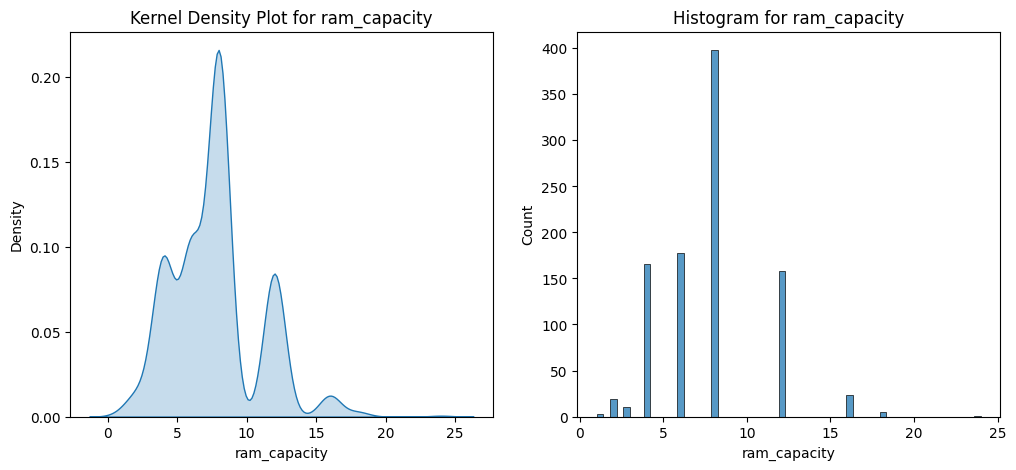

C:\Users\admin\AppData\Local\Temp\ipykernel_9096\1563063068.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


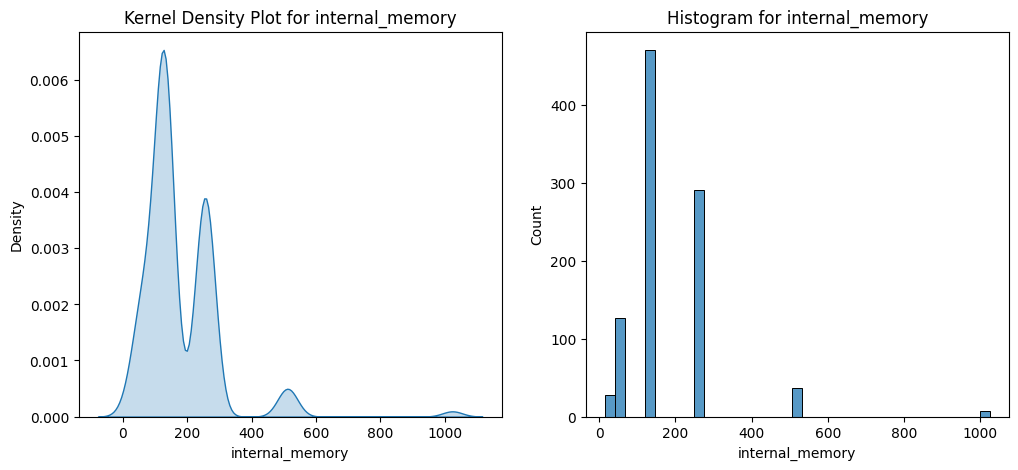

C:\Users\admin\AppData\Local\Temp\ipykernel_9096\1563063068.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


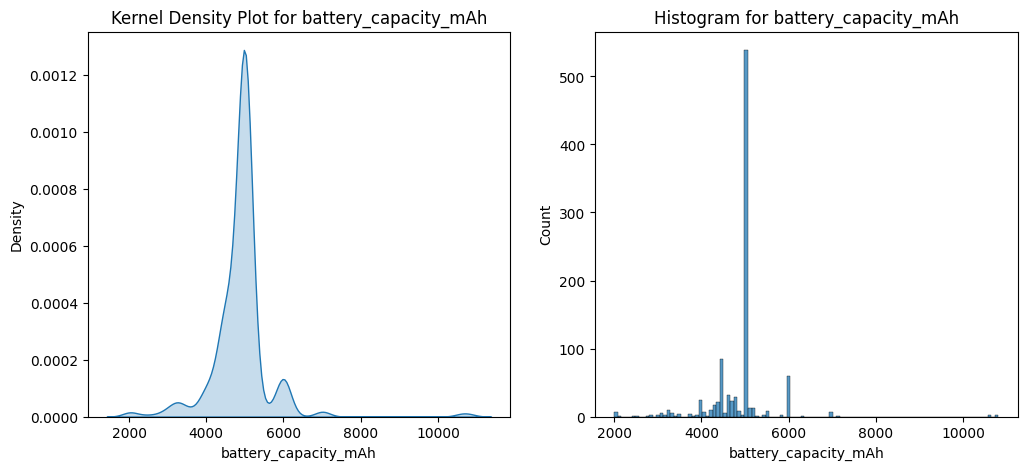

C:\Users\admin\AppData\Local\Temp\ipykernel_9096\1563063068.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


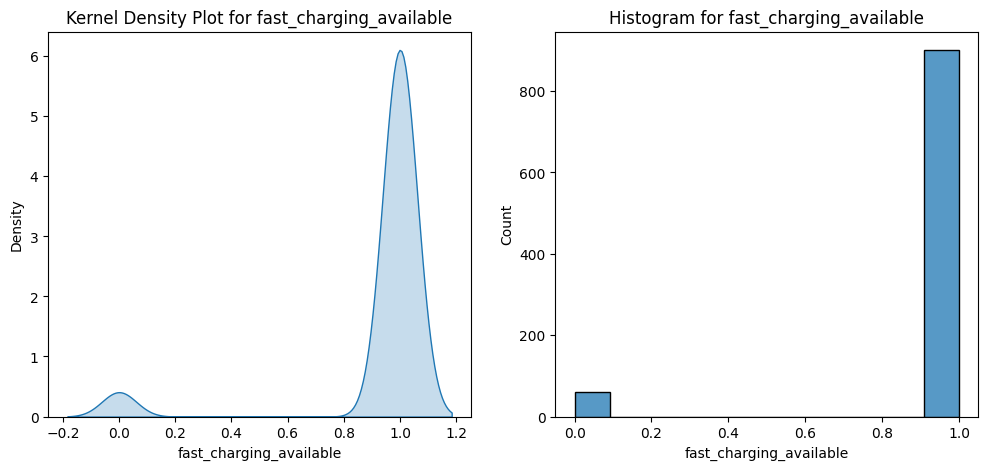

C:\Users\admin\AppData\Local\Temp\ipykernel_9096\1563063068.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


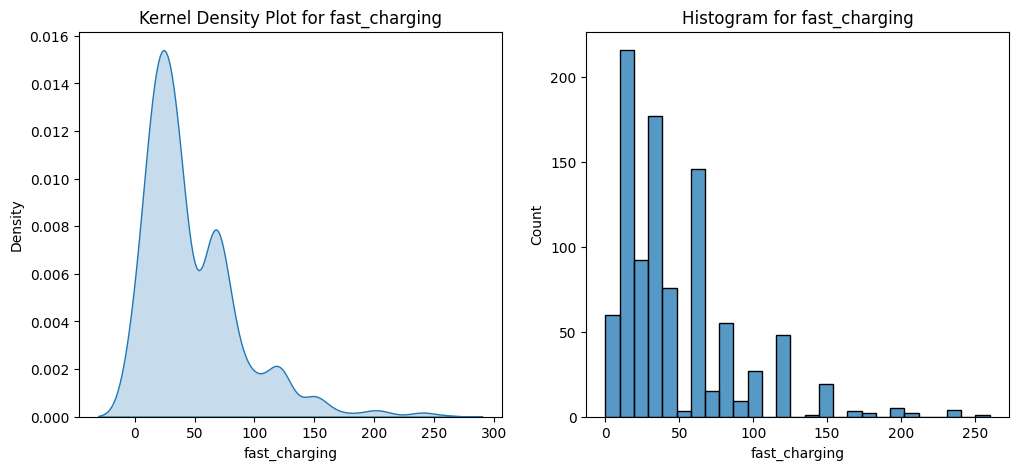

C:\Users\admin\AppData\Local\Temp\ipykernel_9096\1563063068.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


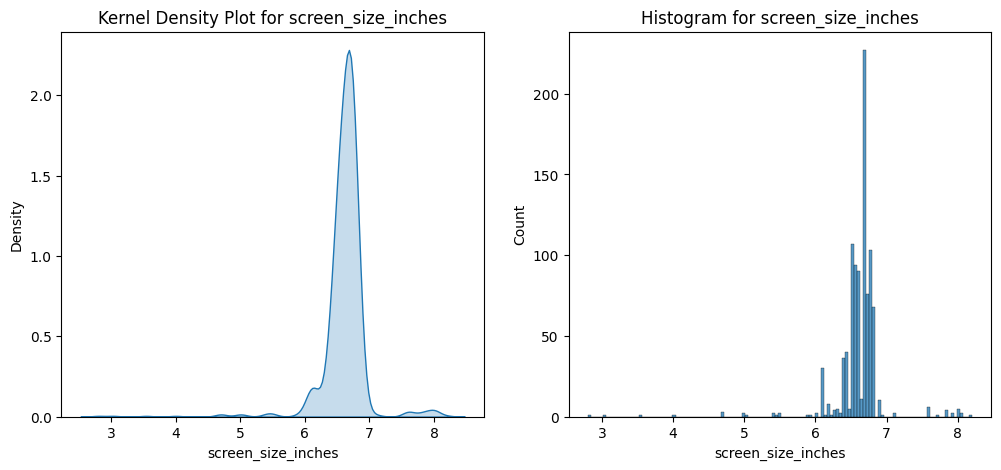

C:\Users\admin\AppData\Local\Temp\ipykernel_9096\1563063068.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


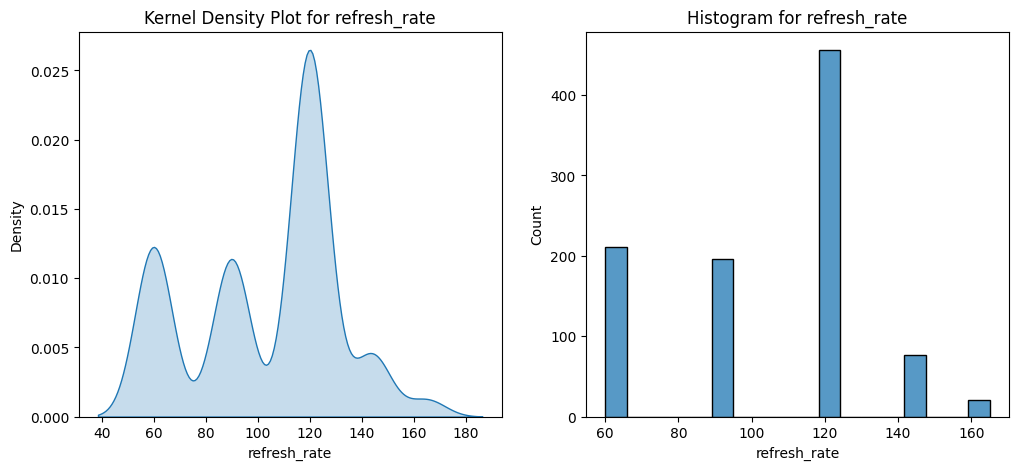

C:\Users\admin\AppData\Local\Temp\ipykernel_9096\1563063068.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


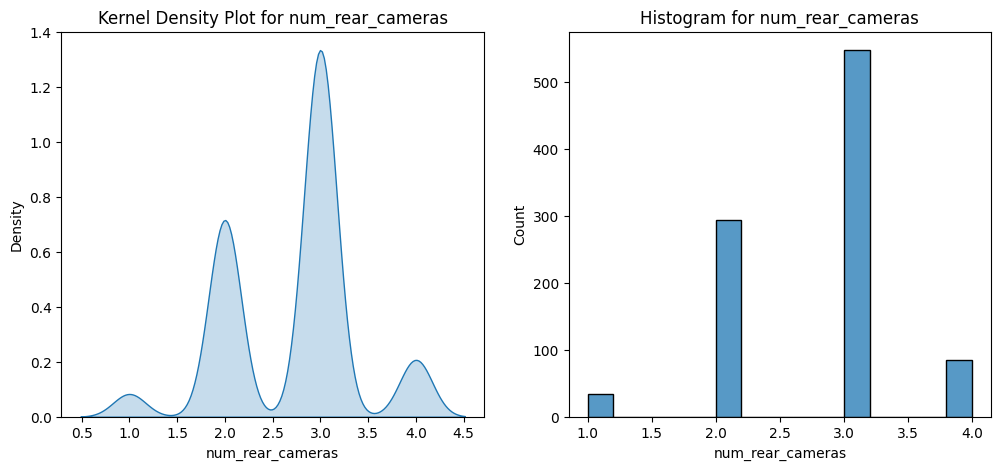

C:\Users\admin\AppData\Local\Temp\ipykernel_9096\1563063068.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


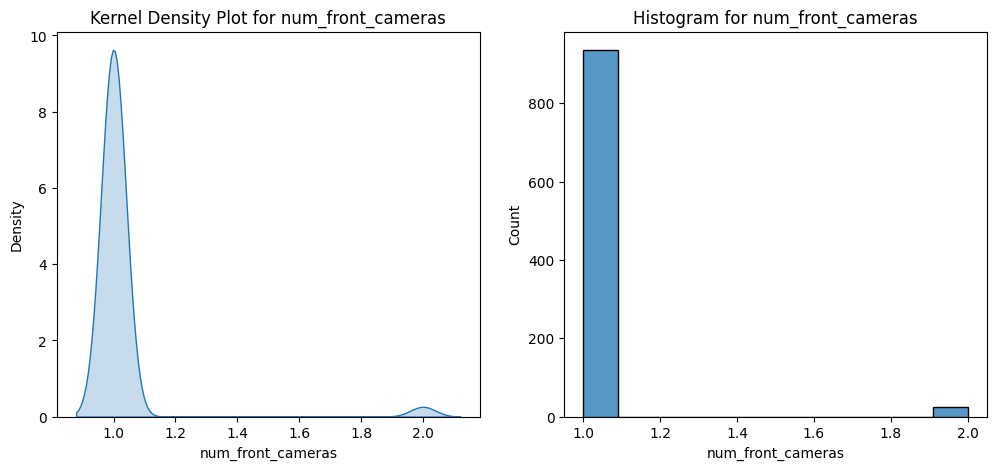

C:\Users\admin\AppData\Local\Temp\ipykernel_9096\1563063068.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


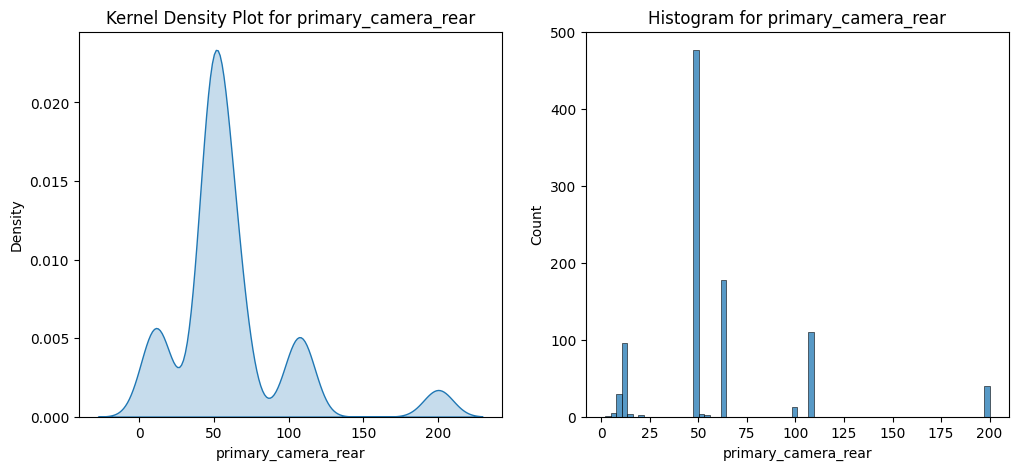

C:\Users\admin\AppData\Local\Temp\ipykernel_9096\1563063068.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


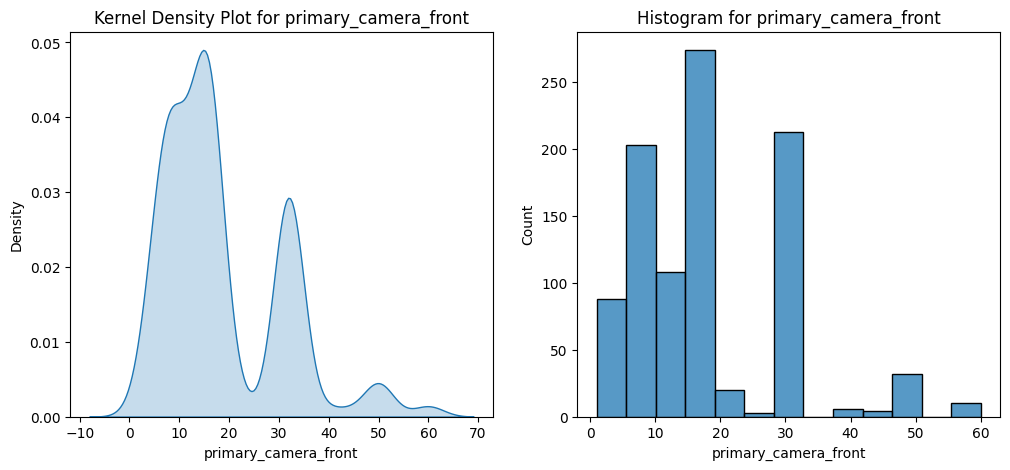

C:\Users\admin\AppData\Local\Temp\ipykernel_9096\1563063068.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


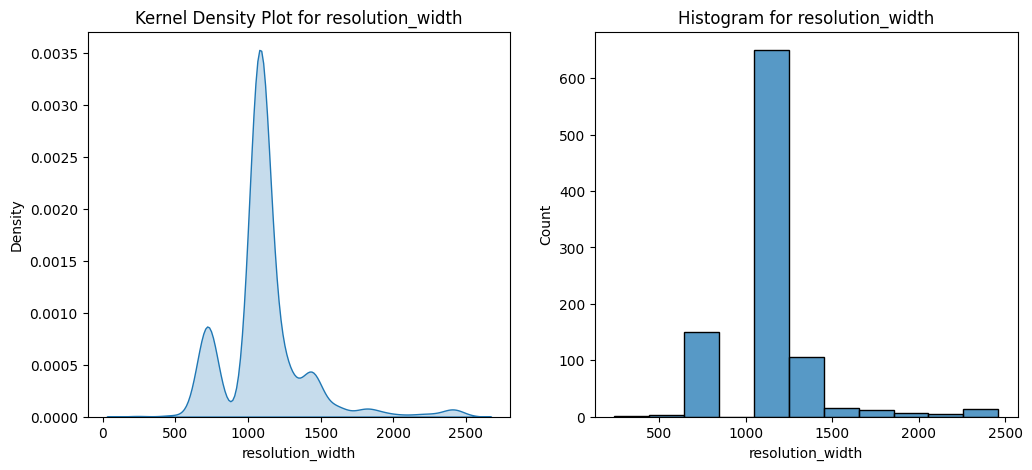

C:\Users\admin\AppData\Local\Temp\ipykernel_9096\1563063068.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


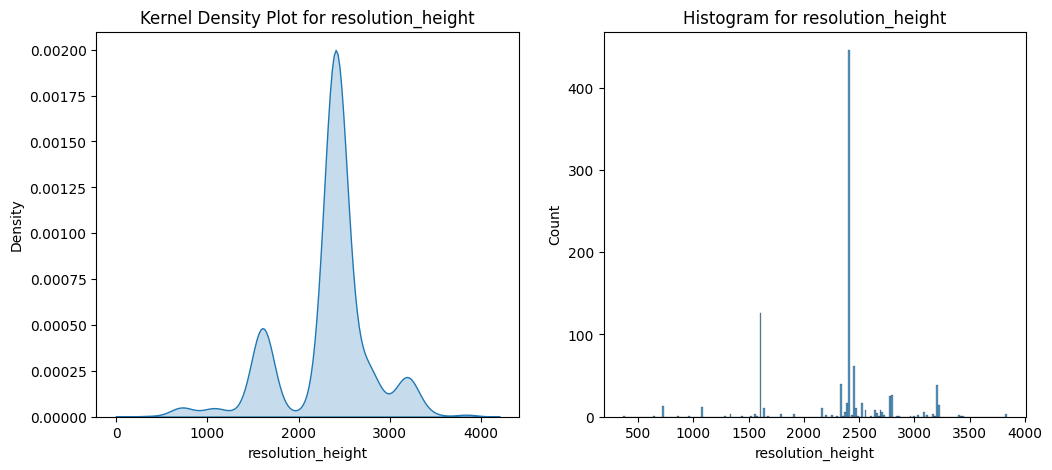

In [ ]:
int_float_cols = df.select_dtypes(include=['int','float']).columns
int_float_cols

for col in int_float_cols:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(121)
    sns.kdeplot(df[col], shade=True)
    plt.title(f'Kernel Density Plot for {col}')
    
    plt.subplot(122)
    sns.histplot(df[col], kde=False)
    plt.title(f'Histogram for {col}')
    
    plt.show()


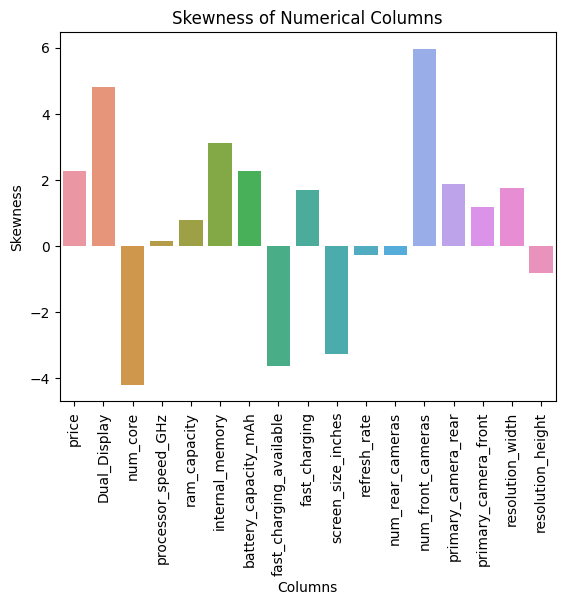

In [ ]:
# Graph of skewness
int_float_cols = df.select_dtypes(include=['int', 'float'])

sns.barplot(x=int_float_cols.columns, y=int_float_cols.skew().values)
plt.xticks(rotation=90)  
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.title('Skewness of Numerical Columns')
plt.show()


In [ ]:
df.columns

Index(['price', 'os', 'Dual_Display', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'processor_brand', 'num_core', 'processor_speed_GHz', 'ram_capacity',
       'internal_memory', 'battery_capacity_mAh', 'fast_charging_available',
       'fast_charging', 'screen_size_inches', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'primary_camera_rear',
       'primary_camera_front', 'brand_name', 'resolution_width',
       'resolution_height'],
      dtype='object')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , PowerTransformer , FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor

In [ ]:
# df['processor_brand'].value_counts()
# def processor(text):
#     if ('unisoc' or 'tiger' or 'spreadtrum' or 'tensor' or 'google' or 'kirin') in text:
#         return 'other'
    
# df['processor_brand'] = df['processor_brand'].apply(processor)

In [ ]:
df['processor_brand'].value_counts()

processor_brand
qualcomm snapdragon    387
dimensity              241
helio                  143
exynos                  55
bionic                  42
unisoc                  27
missing                 27
tiger                   18
spreadtrum               6
tensor                   5
google                   5
kirin                    5
Name: count, dtype: int64

In [ ]:
x = df.drop(columns=['price'])
y = np.log1p(df['price'])
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=2)

In [ ]:
pt = PowerTransformer()

step1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,5,19]),
    ('log1p', FunctionTransformer(np.log1p, validate=False), [6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21])
],remainder='passthrough')

step2 = Ridge(alpha=1)

pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

from sklearn.metrics import r2_score,mean_absolute_error
y_pred = pipe.predict(X_test)
print("R-squared score:",r2_score(y_test, y_pred))
print("MAE            :",mean_absolute_error(y_test, y_pred))
print(np.expm1(mean_absolute_error(y_test, y_pred)))

y_pred_original_scale = np.expm1(y_pred)
inverse_transformed_mae = mean_absolute_error(np.expm1(y_test), y_pred_original_scale)
print(inverse_transformed_mae)

R-squared score: 0.888636584661403
MAE            : 0.18796055189564415
0.2067859089941481
6714.450011584595


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Random Forest Regressor**

In [ ]:
pt = PowerTransformer()

step1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,5,19]),
    ('log1p', FunctionTransformer(np.log1p, validate=False), [6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=25)

pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

from sklearn.metrics import r2_score,mean_absolute_error
y_pred = pipe.predict(X_test)
print("R-squared score:",r2_score(y_test, y_pred))
print("MAE            :",mean_absolute_error(y_test, y_pred))
print(np.exp(mean_absolute_error(y_test, y_pred)))

y_pred_original_scale = np.expm1(y_pred)
inverse_transformed_mae = mean_absolute_error(np.expm1(y_test), y_pred_original_scale)
print(inverse_transformed_mae)

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R-squared score: 0.87758300954824
MAE            : 0.18718720303917616
1.205853003268709
7028.521289848954


# **Adaaboost**

In [ ]:
pt = PowerTransformer()

step1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,5,19]),
    ('log1p', FunctionTransformer(np.log1p, validate=False), [6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=25)

pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

from sklearn.metrics import r2_score,mean_absolute_error
y_pred = pipe.predict(X_test)
print("R-squared score:",r2_score(y_test, y_pred))
print("MAE            :",mean_absolute_error(y_test, y_pred))
print(np.exp(mean_absolute_error(y_test, y_pred)))

y_pred_original_scale = np.expm1(y_pred)
inverse_transformed_mae = mean_absolute_error(np.expm1(y_test), y_pred_original_scale)
print(inverse_transformed_mae)

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R-squared score: 0.8427571515606348
MAE            : 0.2381710628136831
1.2689262403530321
8397.94306178303


# **Extra Tree Regressor**

In [ ]:
pt = PowerTransformer()

step1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,5,19]),
    ('log1p', FunctionTransformer(np.log1p, validate=False), [6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=25,random_state=5)

pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

from sklearn.metrics import r2_score,mean_absolute_error
y_pred = pipe.predict(X_test)
print("R-squared score:",r2_score(y_test, y_pred))
print("MAE            :",mean_absolute_error(y_test, y_pred))
print(np.exp(mean_absolute_error(y_test, y_pred)))

y_pred_original_scale = np.expm1(y_pred)
inverse_transformed_mae = mean_absolute_error(np.expm1(y_test), y_pred_original_scale)
print(inverse_transformed_mae)

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R-squared score: 0.9053152263525563
MAE            : 0.17131032773352708
1.1868590071441054
6533.6024620988355


# **SVR**

In [ ]:
pt = PowerTransformer()

step1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,5,19]),
    ('log1p', FunctionTransformer(np.log1p, validate=False), [6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21])
],remainder='passthrough')

step2 = SVR(epsilon=0.1,kernel='poly')

pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

from sklearn.metrics import r2_score,mean_absolute_error
y_pred = pipe.predict(X_test)
print("R-squared score:",r2_score(y_test, y_pred))
print("MAE            :",mean_absolute_error(y_test, y_pred))
print(np.exp(mean_absolute_error(y_test, y_pred)))

y_pred_original_scale = np.expm1(y_pred)
inverse_transformed_mae = mean_absolute_error(np.expm1(y_test), y_pred_original_scale)
print(inverse_transformed_mae)

R-squared score: 0.8405832824805846
MAE            : 0.2369515778766366
1.2673797470709847
9479.897426390382


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Gradient Descent**

In [ ]:
pt = PowerTransformer()

step1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,5,19]),
    ('log1p', FunctionTransformer(np.log1p, validate=False), [6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=100,learning_rate=0.15)

pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

from sklearn.metrics import r2_score,mean_absolute_error
y_pred = pipe.predict(X_test)
print("R-squared score:",r2_score(y_test, y_pred))
print("MAE            :",mean_absolute_error(y_test, y_pred))
print(np.exp(mean_absolute_error(y_test, y_pred)))

y_pred_original_scale = np.expm1(y_pred)
inverse_transformed_mae = mean_absolute_error(np.expm1(y_test), y_pred_original_scale)
print(inverse_transformed_mae)

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R-squared score: 0.9059032883071249
MAE            : 0.16805946345091488
1.183006954232309
6498.98918728841


In [ ]:
X_train.columns

Index(['os', 'Dual_Display', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'processor_brand', 'num_core', 'processor_speed_GHz', 'ram_capacity',
       'internal_memory', 'battery_capacity_mAh', 'fast_charging_available',
       'fast_charging', 'screen_size_inches', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'primary_camera_rear',
       'primary_camera_front', 'brand_name', 'resolution_width',
       'resolution_height'],
      dtype='object')

# **Voting Regressor**

In [ ]:
pt = PowerTransformer()

step1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[0,5,19]),
    ('pt', PowerTransformer(), [6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21])
],remainder='passthrough')

step2 = VotingRegressor([('rf',RandomForestRegressor(n_estimators=23,random_state=5,)),
                         ('ridge',Ridge(alpha=2)),
                          ('et',ExtraTreesRegressor(n_estimators=25,random_state=5)),
                           ('gd',GradientBoostingRegressor(n_estimators=100,learning_rate=0.15))])

pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

from sklearn.metrics import r2_score,mean_absolute_error
y_pred = pipe.predict(X_test)
print("R-squared score:",r2_score(y_test, y_pred))
print("MAE            :",mean_absolute_error(y_test, y_pred))
print(np.exp(mean_absolute_error(y_test, y_pred)))

y_pred_original_scale = np.expm1(y_pred)
inverse_transformed_mae = mean_absolute_error(np.expm1(y_test), y_pred_original_scale)
print(inverse_transformed_mae)

R-squared score: 0.9117925861768554
MAE            : 0.16126629962693173
1.1749978286382075
5893.846127230229


In [ ]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
df.sample(1).values

array([[11999, 'android', 0, True, False, False, 'dimensity', 8, 2.2,
        8.0, 128, 5000.0, 0, 0.0, 6.5, 90, 3, 1, 50.0, 8.0, 'lava', 1600,
        720]], dtype=object)

In [25]:
df[df['os'] == 'ios'].sample(1).values

array([[119900, 'ios', 0, True, True, False, 'bionic', 6, 3.46, 6.0, 128,
        3200.0, 1, 15.0, 6.1, 120, 3, 1, 48.0, 12.0, 'apple', 1179, 2556]],
      dtype=object)

## **Tried to build a column named pixel per inch but the r2 score is still upto 0.90**

In [36]:
import pickle
df_p = pickle.load(open('df.pkl','rb'))

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , PowerTransformer , FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
import numpy as np
import pandas as pd

In [38]:
df_p.columns

Index(['price', 'os', 'Dual_Display', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'processor_brand', 'num_core', 'processor_speed_GHz', 'ram_capacity',
       'internal_memory', 'battery_capacity_mAh', 'fast_charging_available',
       'fast_charging', 'screen_size_inches', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'primary_camera_rear',
       'primary_camera_front', 'brand_name', 'resolution_width',
       'resolution_height'],
      dtype='object')

In [39]:
df_p['pixel_per_inch'] = (((df['resolution_width'])**2 + (df['resolution_height'])**2)**0.5)/df['screen_size_inches']

In [40]:
df_pi = df_p.drop(columns=['resolution_width','resolution_height','screen_size_inches'])

In [41]:
x = df_pi.drop(columns=['price'])
y = np.log1p(df_pi['price'])

X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=2)

In [42]:
for i,k in enumerate(X_test.columns):
    print(i,'-',k)

0 - os
1 - Dual_Display
2 - has_5g
3 - has_nfc
4 - has_ir_blaster
5 - processor_brand
6 - num_core
7 - processor_speed_GHz
8 - ram_capacity
9 - internal_memory
10 - battery_capacity_mAh
11 - fast_charging_available
12 - fast_charging
13 - refresh_rate
14 - num_rear_cameras
15 - num_front_cameras
16 - primary_camera_rear
17 - primary_camera_front
18 - brand_name
19 - pixel_per_inch


In [43]:
pt = PowerTransformer()

step1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[0,5,18]),
    ('pt', PowerTransformer(), [6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17,19])
],remainder='passthrough')

step2 = VotingRegressor([('rf',RandomForestRegressor(n_estimators=23,random_state=5,)),
                         ('ridge',Ridge(alpha=2)),
                          ('et',ExtraTreesRegressor(n_estimators=22,random_state=5)),
                           ('gd',GradientBoostingRegressor(n_estimators=100,learning_rate=0.15))])

pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

from sklearn.metrics import r2_score,mean_absolute_error
y_pred = pipe.predict(X_test)
print("R-squared score:",r2_score(y_test, y_pred))
print("MAE            :",mean_absolute_error(y_test, y_pred))
print(np.exp(mean_absolute_error(y_test, y_pred)))

y_pred_original_scale = np.expm1(y_pred)
inverse_transformed_mae = mean_absolute_error(np.expm1(y_test), y_pred_original_scale)
print(inverse_transformed_mae)

R-squared score: 0.9086078737126835
MAE            : 0.1615645460112561
1.175348319755944
6137.399745869029
